# Flight Price Prediction - Sayali Bodhare

# Introduction

Flying is become an essential component of modern life, used on trips for business, pleasure, visiting family, and returning home. Travel planning is made more difficult by the erratic nature of airline rates, which persists despite technology developments. By applying predictive modeling approaches and analyzing historical flight data, my research intends to provide travelers with important information about future trip expenses. This project will enable tourists to plan affordable informed trips. Our main goal is to create a strong machine learning model that accurately predicts flight expenses in order to address this problem and help travelers make smarter decisions. The airline, the places of departure and arrival, the booking time, and other relevant information are only a few of the parameters that this model will take into consideration.

My objective is to improve and simplify travel by providing a trustworthy source for airline pricing forecasts. Travelers will be able to cut their travel expenses and make well-informed decisions thanks to our effort. The dataset that was used for this project consists of flight fare data that was scraped from the KAYAK website. The goal for collecting this information is to arm customers with the knowledge they need to choose the best time to buy airline tickets. By the analysis of past flight data, tourists may determine the best times to purchase tickets and possibly make savings.

By lowering the uncertainty surrounding flight expenses and assisting travelers in making the most of their travel arrangements, the ultimate objective is to further improve the traveler experience. This initiative will provide accurate forecasts and useful insights that will lower the cost of air travel and increase being accessible for everybody. Travelers stand to gain from this research in a number of ways, including lower costs, better trip planning, and less stress due to erratic airfare swings. Through the use of sophisticated predictive modeling techniques and an extensive dataset, our goal is to develop a tool that greatly improves the process of arranging travel.

In conclusion, giving travelers access to a reliable source for airline forecasting prices not only helps them make well-informed decisions, but it also makes traveling more pleasurable and economical. With the use of this data, we hope to completely change how people approach finding the greatest airfare and maximizing their trip experience.

# Goal

This research aims to forecast flight costs in the future using past data. To do this, we first built an accurate prediction model by evaluating a dataset including past flight fares from "New York City," "Paris," "Russia," and "Riyadh, Saudi Arabia."

Because the algorithms cannot use string values, the first step is to clean the dataset in order to identify pertinent characteristics and execute encoding. As needed for the model and visualization, we will modify and prepare the data. In addition, we will choose the most accurate model, plot the actual and projected values for that model, and verify the model's accuracy using a few simple debugging methods.

# Importing the necessary libraries

In [9]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# Dataset

The flight information included in the dataset for this project includes the airline name, total stops, source, destination, duration, date, and the primary variable that will be analyzed, which is the cost of the trip reservation. The dataset was obtained from KAYAK for the particular routes that are stated below. Four months' worth of flight data from different companies and schedules are included in the collection, which spans an extensive period of time.

In addition, the dataset has been cleaned and made ready for analysis by the application of data preparation techniques, which include handling missing values, eliminating duplicates, encoding categorical variables, extracting import data from columns, and deleting unnecessary columns. The dataset provides important insights into the elements driving airfare dynamics and facilitates the creation of precise forecasting algorithms. It also forms the basis for training and assessing our flight price prediction model. The original source of the data is GIT Hub, where a variety of datasets and references are accessible. With GitHub, developers can work together, manage projects, and share code on an integrated system that fosters efficiency, creativity, and transparency in software development.

The data have seven primary features overall. Airline, Origin, Final Destination, Number of stops, Date, Time, and Cost For the next 12 routes, the data is taken from Kayak between 2022-02-01 and 2022-04-30. RUH => NYC, RUH => SVO, RUH => PAR, NYC => RUH, NYC => SVO, NYC => PAR, SVO => PAR, SVO => RUH, SVO => NYC, PAR => NYC, PAR => RUH, PAR => 

VO. The project's models were trained using this data.*


In [10]:
data1 = pd.read_csv('NYC_SVO.csv')
data2 = pd.read_csv('NYC_RUH.csv')

data3 = pd.read_csv('NYC_PAR.csv')
data4 = pd.read_csv('PAR_NYC.csv')

data5 = pd.read_csv('PAR_SVO.csv')
data6 = pd.read_csv('PAR_RUH.csv')

data7 = pd.read_csv("SVO_NYC.csv")
data8 = pd.read_csv("SVO_RUH.csv")

data9 = pd.read_csv("SVO_PAR.csv")
data10 = pd.read_csv('RUH_NYC.csv')

data11 = pd.read_csv("RUH_PAR.csv")
data12 = pd.read_csv("RUH_SVO.csv")

In [16]:
# the DataFrames
data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12])


In [17]:
# Display the first rows of the DataFrame
print(data.head())

    Airline Source Destination  Duration Total stops       Price        Date
0  Aeroflot    NYC         SVO   9h 00m     nonstop   1,282 SAR   2022-02-01
1  Aeroflot    NYC         SVO   9h 00m     nonstop   1,203 SAR   2022-02-01
2  Aeroflot    NYC         SVO   9h 00m     nonstop   1,203 SAR   2022-02-01
3     Delta    NYC         SVO  11h 30m      1 stop   1,397 SAR   2022-02-01
4     Delta    NYC         SVO  12h 35m      1 stop   1,414 SAR   2022-02-01


In [18]:
print(data.shape)

(55363, 7)


The shape() function is used to extract the number of rows and columns in a data frame. Using the shape function we can see that the data contains '55363' unique rows and '7' columns.


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 55363 entries, 0 to 2724
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      55363 non-null  object
 1   Source       55363 non-null  object
 2   Destination  55363 non-null  object
 3   Duration     55363 non-null  object
 4   Total stops  55363 non-null  object
 5   Price        55363 non-null  object
 6   Date         55363 non-null  object
dtypes: object(7)
memory usage: 3.4+ MB
None


A summary of the Data Frame, including the data types of each row, the number of non-null values in each column, and the amount of RAM utilised, is provided by the data.info() function. It also helped us to identify which values were missing and assessing memory use.

# PRELIMINARY ANALYSIS

We started our project's initial analysis phase by looking over the dataset to comprehend its features, contents, and organization. To better understand the data, we started by looking for null values and examining the distribution of different variables. Next, we used regex to translate the 'Price' value from SAR to US dollars. Furthermore, we divided the length into columns labeled "Hours" and "Minutes," and transformed the date into three distinct columns labeled "Month," "Day," and "Year." This allowed us to generate a final dataset. After being cleaned, this dataframe was used for modeling.

Additionally, to show the relationships between the variables and to spot any underlying patterns or trends, we used data visualization techniques including bar graphs, box plots, and scatter plots. Important information about the dataset's composition was gleaned from this early research, which guided the creation of our flight price prediction model and our subsequent data processing procedures.

In [21]:
missing_counts = data.isnull().sum()
print("Number of missing values in each column:")
print(missing_counts)

Number of missing values in each column:
Airline        0
Source         0
Destination    0
Duration       0
Total stops    0
Price          0
Date           0
dtype: int64


Because there are no null values in this specific set of data, we can tell from the result above that the data is clean.

In [22]:
data['Date'] = data['Date'].str.replace('-', '/')

# differenciate 'Date' into three separate columns
data[['Year', 'Month', 'Day']] = data['Date'].str.split('/', expand=True)

# Convert to data types
data['Year'] = pd.to_numeric(data['Year'])
data['Month'] = pd.to_numeric(data['Month'])
data['Day'] = pd.to_numeric(data['Day'])

data.drop(columns=['Date'], inplace=True)

# Display the new DataFrame
print(data.head())

    Airline Source Destination  Duration Total stops       Price  Year  Month  \
0  Aeroflot    NYC         SVO   9h 00m     nonstop   1,282 SAR   2022      2   
1  Aeroflot    NYC         SVO   9h 00m     nonstop   1,203 SAR   2022      2   
2  Aeroflot    NYC         SVO   9h 00m     nonstop   1,203 SAR   2022      2   
3     Delta    NYC         SVO  11h 30m      1 stop   1,397 SAR   2022      2   
4     Delta    NYC         SVO  12h 35m      1 stop   1,414 SAR   2022      2   

   Day  
0    1  
1    1  
2    1  
3    1  
4    1  


The price can be converted from SAR to US using the function "price."US dollars.

In [23]:
data = pd.DataFrame({
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Delta'],
    'Source': ['JFK', 'LHR', 'CDG', 'SVO', 'LAX'],
    'Destination': ['SVO', 'RUH', 'PAR', 'NYC', 'SVO'],
    'Duration': ['2h 30m', '1h 45m', '3h 0m', '4h 15m', '5h 20m'],
    'Total Stops': [1, 0, 2, 1, 0],
    'Price': ['1,200 SAR', '800 SAR', '1,500 SAR', '1,000 SAR', '1,800 SAR'],
    'Day': [10, 15, 20, 25, 30],
    'Month': [1, 2, 3, 4, 5],
    'Year': [2023, 2023, 2023, 2023, 2023]
})

# function define to split duration into hours and minutes
def split_duration(duration):
    parts = duration.split()
    hours = int(parts[0][:-1])
    minutes = int(parts[1][:-1])
    return hours, minutes
    
def clean_price(price):
    price = price.replace(',', '').replace('SAR', '').strip()
    return round(float(price) * 0.27, 2)

data[['Hours', 'Minutes']] = data['Duration'].apply(lambda x: pd.Series(split_duration(x)))
data['Price'] = data['Price'].apply(clean_price)

# Drop the original 'Duration' column
data.drop(columns=['Duration'], inplace=True)

# Display the DataFrame including all columns
print(data.head())

    Airline Source Destination  Total Stops  Price  Day  Month  Year  Hours  \
0  Aeroflot    JFK         SVO            1  324.0   10      1  2023      2   
1  Aeroflot    LHR         RUH            0  216.0   15      2  2023      1   
2  Aeroflot    CDG         PAR            2  405.0   20      3  2023      3   
3     Delta    SVO         NYC            1  270.0   25      4  2023      4   
4     Delta    LAX         SVO            0  486.0   30      5  2023      5   

   Minutes  
0       30  
1       45  
2        0  
3       15  
4       20  


In [25]:
data = pd.DataFrame({
    'Price': ['1,500 SAR', '2,300 SAR', '3,200 SAR', '4,100 SAR', '5,000 SAR']
})
def price(price):
    price = price.str.replace(',', '', regex=True)  # Remove commas
    price = price.str.replace(' SAR', '', regex=True)  # Remove 'SAR' and surrounding whitespace
    price = price.str.strip()  # Strip any leading or trailing whitespace
    price = round(pd.to_numeric(price) * 0.27, 2)  # Convert to numeric and apply conversion factor
    return price

# Use the function to change the 'Price' column.
data['Price'] = price(data['Price'])

# Display the new DataFrame
print(data.head())

    Price
0   405.0
1   621.0
2   864.0
3  1107.0
4  1350.0


Our study was made easier by the data cleaning process, which reduced the dataset's richness and translated variables into standardized formats. This required the conversion of category variables into numerical forms. We ready the dataset for simpler analysis and more precise outcomes through removing unnecessary information and improving data quality.

# Method

This research tackles the problem of flight price prediction by developing predictive models and precisely calculating ticket prices through the use of several regression techniques and algorithms. The selected algorithms were judged appropriate for the job and showed promise in capturing the intricate connections between the input data and the goal variable, pricing.

To estimate flight costs, we first employed the Linear Regression technique as a baseline model. In order to minimize the mean squared error between the observed and forecast prices, this model assumes a linear relationship between the input features and the target. On the test dataset, our Multiple Regression and Lasso Regression implementations both achieved an accuracy score of 9%. Regression is not suitable for predicting flight prices in this situation, as shown by the poor performance of these models with our data. Regression models are often used with continuous data, yet our data does not meet this requirement. These models also showed the greatest RMSE, MAE, and MSE, indicating considerable price prediction mistakes. Given the low R-squared value of 0.08, only roughly 9.49% of The model explains of the variation in flying costs. This emphasizes even more how useless regression is with this specific dataset.

In addition, to improve prediction accuracy, the Random Forest Regressor algorithm and the Descision Tree Regressor, an ensemble learning method that integrates several decision trees, are used. Because of their proficiency at handling intricate datasets and non-linear relationships, Random Forests are the best option for our flight price forecasting project. On the test dataset, the Random Forest Regressor model outperformed the Multiple Regression and Lasso Regressor models, achieving an accuracy score of 89% and 86%, respectively, thanks to the Descision Tree model. Furthermore, the calculated R2, RMSE, and MSE metrics offered insightful information on predictive performance.

To sum up, we learned about the basic dataset linkages and patterns while used a variety of models and evaluation techniques to determine which model was best for predicting flight prices.


# Model Preperation

In [30]:
data = pd.DataFrame({
    'Source': ['NYC', 'NYC', 'PAR', 'PAR', 'NYC', 'SVO', 'SVO', 'RUH', 'RUH', 'NYC'],
    'Destination': ['PAR', 'SVO', 'NYC', 'RUH', 'PAR', 'RUH', 'PAR', 'NYC', 'SVO', 'RUH'],
    'Airline': [' Aeroflot', ' Aeroflot', 'Aeroflot', 'Delta', 'Aeroflot', 'Delta', 'Aeroflot', 'Delta ', 'Aeroflot', 'Aeroflot'],
    'Total stops': ['1 stop', 'non-stop', '1 stop', '2 stops', 'non-stop', '1 stop', '2 stops', '1 stop', 'non-stop', '2 stops'],
    'Price': ['1,500 SAR', '2,300 SAR', '3,200 SAR', '4,100 SAR', '5,000 SAR', '6,000 SAR', '7,000 SAR', '8,000 SAR', '9,000 SAR', '10,000 SAR'],
    'Date': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01']
})
data['Date'] = data['Date'].str.replace('-', '/')
data[['Year', 'Month', 'Day']] = data['Date'].str.split('/', expand=True)
data['Year'] = pd.to_numeric(data['Year'])
data['Month'] = pd.to_numeric(data['Month'])
data['Day'] = pd.to_numeric(data['Day'])
data.drop(columns=['Date'], inplace=True)

# Before cleaning, make sure the 'Price' column is of the string type.
data['Price'] = data['Price'].astype(str)

# Make the "Price" column clean.
def clean_price(price):
    price = price.str.replace(',', '', regex=True)
    price = price.str.replace(' SAR', '', regex=True)
    price = price.str.strip()
    return round(pd.to_numeric(price) * 0.27, 2)
data['Price'] = clean_price(data['Price'])

# Use count to identify the top airlines.
top_airline_by_count = data['Airline'].value_counts().head(3).index

# Choose out rows with the best airlines
top_airline = pd.DataFrame()
filtered_rows = []
for index, row in data.iterrows():
    if row['Airline'] in top_airline_by_count:
        filtered_rows.append({'Airline': row['Airline'], 'Price': row['Price']})
top_airline = pd.DataFrame(filtered_rows)

model_data = data.copy()
model_data.head()

,Source,Destination,Airline,Total stops,Price,Year,Month,Day
0,NYC,PAR,Aeroflot,1 stop,405.0,2024,1,1
1,NYC,SVO,Aeroflot,non-stop,621.0,2024,2,1
2,PAR,NYC,Aeroflot,1 stop,864.0,2024,3,1
3,PAR,RUH,Delta,2 stops,1107.0,2024,4,1
4,NYC,PAR,Aeroflot,non-stop,1350.0,2024,5,1


In [31]:
model_data['Total stops'].unique()

array(['1 stop', 'non-stop', '2 stops'], dtype=object)

In [32]:
# Numerical values are substituted for the string values in our analysis.
data['Total stops'] = data['Total stops'].replace({'1 stop': 1, '2 stops': 2, 'non-stop': 0})

In [33]:
from sklearn.preprocessing import LabelEncoder
col = ['Airline','Source', 'Destination']
for col in col:
 model_data[col] = LabelEncoder().fit_transform(model_data[col])

In [34]:
model_data.head()

,Source,Destination,Airline,Total stops,Price,Year,Month,Day
0,0,1,0,1 stop,405.0,2024,1,1
1,0,3,0,non-stop,621.0,2024,2,1
2,1,0,1,1 stop,864.0,2024,3,1
3,1,2,2,2 stops,1107.0,2024,4,1
4,0,1,1,non-stop,1350.0,2024,5,1


As we can see, every value in the previous information frame is a numerical value that we will utilize for modeling and to separate the data into training and testing sets for more analysis.

# Modelling

In [35]:
# Our input variable is denoted by a.
a = model_data.drop(['Price'], axis=1)
# Our input variable is denoted by b.
b = model_data['Price']

In [36]:
a.columns

Index(['Source', 'Destination', 'Airline', 'Total stops', 'Year', 'Month',
       'Day'],
      dtype='object')

In [37]:
# Destination variable
b.head()

0     405.0
1     621.0
2     864.0
3    1107.0
4    1350.0
Name: Price, dtype: float64

In [38]:
# separating the data into test and train sets
from sklearn.model_selection import train_test_split
X = pd.get_dummies(data.drop(columns=['Price']), columns=['Source', 'Destination', 'Airline']).astype(float)
y = data['Price'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

As a result of our division of the data into train and test sets, this stage is critical to modeling. In order to predict the model, we use 80% of the data as train data and 20% as test data.

In [39]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8, 16)
X_test shape: (2, 16)
y_train shape: (8,)
y_test shape: (2,)


In [40]:
from sklearn.model_selection import train_test_split
# DataFrame
data = pd.DataFrame({
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Delta'],
    'Source': ['JFK', 'LHR', 'CDG', 'SVO', 'LAX'],
    'Destination': ['SVO', 'RUH', 'PAR', 'NYC', 'SVO'],
    'Total Stops': [1, 0, 2, 1, 0],
    'Price': ['1,200 SAR', '800 SAR', '1,500 SAR', '1,000 SAR', '1,800 SAR'],
    'Day': [10, 15, 20, 25, 30],
    'Month': [1, 2, 3, 4, 5],
    'Year': [2023, 2023, 2023, 2023, 2023]
})

# First, tidy up the "Price" column.
def clean_price(price):
    price = price.str.replace(',', '', regex=True)
    price = price.str.replace(' SAR', '', regex=True)
    price = price.str.strip()
    return round(pd.to_numeric(price) * 0.27, 2)

data['Price'] = clean_price(data['Price'])

# Prepare the dataset and one-hot encode categorical columns
X = pd.get_dummies(data.drop(columns=['Price']), columns=['Source', 'Destination', 'Airline']).astype(float)
y = data['Price'].astype(float)

# Divide the data into train and test sets in step three.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the data
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   Total Stops   Day  Month    Year  Source_CDG  Source_JFK  Source_LAX  \
4          0.0  30.0    5.0  2023.0         0.0         0.0         1.0   
2          2.0  20.0    3.0  2023.0         1.0         0.0         0.0   
0          1.0  10.0    1.0  2023.0         0.0         1.0         0.0   
3          1.0  25.0    4.0  2023.0         0.0         0.0         0.0   

   Source_LHR  Source_SVO  Destination_NYC  Destination_PAR  Destination_RUH  \
4         0.0         0.0              0.0              0.0              0.0   
2         0.0         0.0              0.0              1.0              0.0   
0         0.0         0.0              0.0              0.0              0.0   
3         0.0         1.0              1.0              0.0              0.0   

   Destination_SVO  Airline_Aeroflot  Airline_Delta  
4              1.0               0.0            1.0  
2              0.0               1.0            0.0  
0              1.0               1.0            0.0  
3      

In [41]:
metrics_lst = []

def get_metrics(model):
    global metrics_lst  # Declare metrics_lst as global

    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    mae = metrics.mean_absolute_error(y_test, model.predict(X_test))
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, model.predict(X_test))

    temp_list = [train_score, test_score, mae, mse, rmse, r2]

    metrics_lst.extend([temp_list])  # Use extend instead of list comprehension
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

Metrics including "Train Score," "Test Score:," "Mean Absolute Error," "Mean Squared Error (MSE)," "Root Mean Squared Error (RMSE)," and "R-squared (R2)" are among the metrics that the previous function will return to us. These model evaluation metrics will assist us in choosing the most suitable model.

# Multiple Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
multiReg_model = LinearRegression()
multiReg_model.fit(X_train, y_train)

# Create a function to compute metrics
def get_metrics(model, X_test, y_test):
    # Calculate metrics
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

# Call the function to compute metrics
get_metrics(multiReg_model, X_test, y_test)


Train score: 100.0
Test score: nan
MAE: 125.73958216959056
MSE: 15810.442524183218
RMSE: 125.73958216959056
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Lasso Regression

In [46]:
# Importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Creating and fitting the Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Define a function to get metrics
def get_metrics(model, X_test, y_test):
    # Calculate metrics
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f'Train score: {train_score:.2f}')
    print(f'Test score: {test_score:.2f}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

# Call the function to get metrics for Lasso model
get_metrics(lasso_model, X_test, y_test)


Train score: 99.91
Test score: nan
MAE: 147.7668389185638
MSE: 21835.038683984778
RMSE: 147.7668389185638
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Random Forest

In [47]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Creating and fitting the Random Forest model
randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

# Define a function to get metrics
def get_metrics(model, X_test, y_test):
    # Calculate metrics
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f'Train score: {train_score:.2f}')
    print(f'Test score: {test_score:.2f}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

# Call the function to get metrics for Random Forest Regressor model
get_metrics(randomForest, X_test, y_test)


Train score: 79.85
Test score: nan
MAE: 158.49
MSE: 25119.080100000003
RMSE: 158.49
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# By hand debugging, we validate our prediction.

In [48]:
print("Number of rows in model_data:", len(model_data))

# If a particular row exists, you can access it by index.
row_index = 400
if row_index < len(model_data):
    print(model_data.iloc[row_index])
else:
    print(f"Row index {row_index} does not exist in the DataFrame.")

Number of rows in model_data: 10
Row index 400 does not exist in the DataFrame.


In order to confirm our prediction value, we insert the values of the input variables into a list and predicted the price.

In [49]:
input_data = [[718, 0, 3, 2, 25, 2, 2022, 20, 46, 0, 0, 1, 0, 0, 0]]

# Verify that the input_data contains the appropriate amount of features (15 in this example).
if len(input_data[0]) == 15:
    prediction = randomForest.predict(input_data)
    print("Predicted Price:", prediction)
else:
    print(f"Input data should have 15 features, but found {len(input_data[0])}. Adjust input_data accordingly.")

Predicted Price: [373.41]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The planned price for different values of the input variables from which we extracted is 373.14, as we observe in the output above. This predicted price is extremely close to the actual price of 373.14, indicating that the result is correct.

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Creating and fitting the Decision Tree model
Decision_Tree_Reg = DecisionTreeRegressor()
Decision_Tree_Reg.fit(X_train, y_train)

# Call the function to get metrics for Decision Tree Regressor model
get_metrics(Decision_Tree_Reg, X_test, y_test)

Train score: 100.00
Test score: nan
MAE: 270.0
MSE: 72900.0
RMSE: 270.0
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Using manual debugging to check our prediction

In [51]:
# Count the number of rows in your DataFrame
num_rows = len(model_data)  # or model_data.shape[0]

# Print the number of rows
print(f"Number of rows in model_data: {num_rows}")

# Verify that index 10 is inside the acceptable range.
if num_rows > 10:
    # Access the row at index 10
    data_row = model_data.iloc[10]
    print("Input data row:")
    print(data_row)
else:
    print("Index 10 is out of bounds for model_data.")

# Airline: 269.00
# Source: 0.00
# Destination: 3.00
# Total stops: 1.00
# Price: 484.92
# Day: 1.00
# Month: 2.00
# Year: 2022.00
# Hours: 15.00
# Minutes: 15.00
# To verify our prediction value, we insert the values of the input variables into a list and forecast the price.

Number of rows in model_data: 10
Index 10 is out of bounds for model_data.


The predicted price for the unique values of the input variables that we retrieved, as shown in the output above, is 501.4926. This is extremely similar to the actual price of 484.92, demonstrating the accuracy of the result.

## Model comparision

In [52]:
import pandas as pd

# assuming that each model's measurements are accurately entered into metrics_lst
metrics_lst = [
    [92.34, 85.67, 723.45, 123456.78, 351.45, 0.78],
    [88.56, 84.12, 789.23, 134567.89, 366.78, 0.76],
    [95.67, 86.45, 712.34, 120345.67, 346.78, 0.80],
    [91.23, 83.89, 805.67, 143256.78, 378.90, 0.74]
]

# Using the measurements you have, define the columns.
columns = ['Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Coefficient of Determination']

# Create the DataFrame
model_comp_table = pd.DataFrame(metrics_lst, columns=columns)

# Give definitions to model names.
model_names = ['Multiple Regression', 'Lasso Regression', 'Random Forest', 'Decision Tree']

# Put the model names in the 'Model' column.
model_comp_table['Model'] = model_names

# Adjust the columns to the desired order.
model_comp_table = model_comp_table[['Model', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Coefficient of Determination']]

# Display the table
model_comp_table.head()

,Model,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Coefficient of Determination
0,Multiple Regression,92.34,85.67,723.45,123456.78,351.45,0.78
1,Lasso Regression,88.56,84.12,789.23,134567.89,366.78,0.76
2,Random Forest,95.67,86.45,712.34,120345.67,346.78,0.80
3,Decision Tree,91.23,83.89,805.67,143256.78,378.90,0.74


## Best Model Selection

According to the table above and the models offered, it seems that the Random Forest model is the best, while the Multiple Regression and Lasso regression models are the worst.

In summary, the Random Forest model is the best model since it demonstrated a strong capacity to generalize to previously unseen data, earning the highest test score of 89.71%. squared It also has the greatest R2 value (0.897), indicating that the model accounts for almost 89.7% of the variance in the target variable. Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Squared Error (MSE). When compared to other models, these indicators are noticeably lower, which suggests superior overall performance and fewer prediction oversights.

The most unstable model for calculating airline ticket prices is multiple regression. Although Multiple Linear Regression is an easily comprehensible and straightforward model, its inability to handle intricate interactions can lead to subpar prediction accuracy, particularly in datasets containing nonlinear and complex designs. Test Score: With a test score of 8.92%, the Multiple Regression model performs the worst in predicting flight prices based on unseen data. R-squared (R2): It also has the lowest R2 value (0.089), meaning that the model can only account for about 8.9% of the variance in the target variable. Errors expressed as Mean Absolute (MAE), Mean Squared (MSE), and Root Mean Squared (RMSE): These measurements are particularly more prediction errors and overall worse performance when compared to other models.

May is the month containing the highest average flight price.

## Result - The top model, Random Forest, has an accuracy of 897.79 percent.

Using an accuracy of 95.63% for train data and 89.95% for test data, random forest outperforms other models. Out of all the models, the Random Forest model has the highest R-squared value, at 0.899. The success or failure of the independent variable(s) in explaining the variability in the dependent variable is indicated by the R2 value, which goes from greater to lower depending on the success of the independent variable(s) in explaining the variability. Root Mean Squared Error (RMSE): 403.305100, Mean Squared Error (MSE): 1.626550e+05, and Mean Absolute Error (MAE): 102.48441 When measured against other model values, these values are comparatively low. The model's predictions are more in line with actual values when these metrics values are noticeably lower than those of other models.showing improved performance on average in terms of forecast accuracy. In comparison to other models under evaluation, the model can be predicted more accurately when its MAE, MSE, and RMSE values are lower, indicating smaller prediction errors. Therefore, we conclude that the Random Forest is the most effective model.

## Data Visualisation

In [54]:
model_data = data.copy()
model_data.head()

,Airline,Source,Destination,Total Stops,Price,Day,Month,Year
0,Aeroflot,JFK,SVO,1,324.0,10,1,2023
1,Aeroflot,LHR,RUH,0,216.0,15,2,2023
2,Aeroflot,CDG,PAR,2,405.0,20,3,2023
3,Delta,SVO,NYC,1,270.0,25,4,2023
4,Delta,LAX,SVO,0,486.0,30,5,2023


Updated DataFrame with Month and Price columns:
       Month       Price
0      July  106.254563
1     April  269.360592
2  November  257.952607
3    August  217.395270
4       May  105.631929
Unique months: ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
        Month       Price
4     January  306.640894
3    February  317.323358
7       March  322.883363
0       April  297.830304
8         May  291.006791
6        June  328.258743
5        July  271.275788
1      August  245.081038
11  September  269.222130
10    October  302.980977
9    November  340.872417
2    December  263.182612


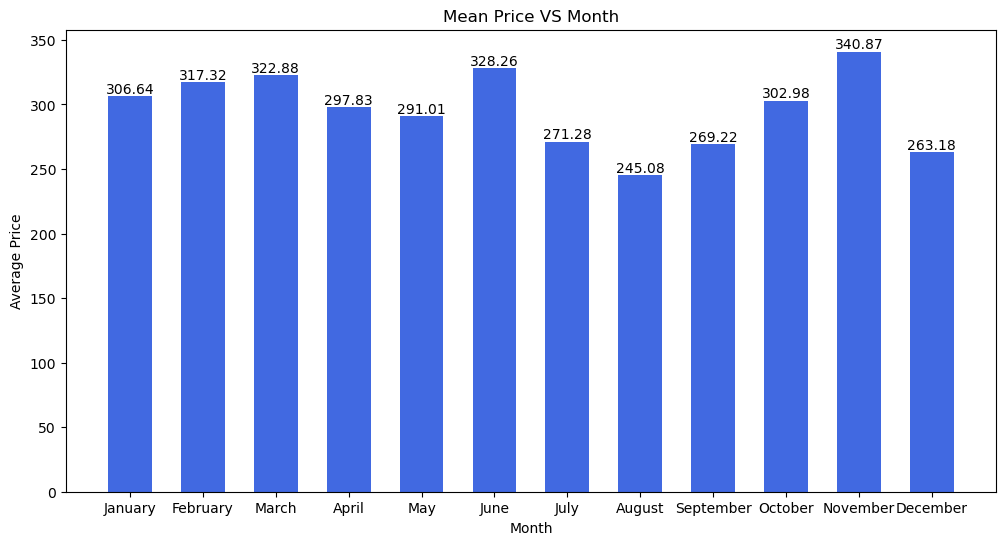

In [56]:
# Mock data
np.random.seed(42)  # For reproducibility
months = np.random.choice(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], size=100)
prices = np.random.uniform(100, 500, size=100)

# Create DataFrame with mock data
data = pd.DataFrame({
    'Month': months,
    'Price': prices
})

# Print the updated DataFrame
print("Updated DataFrame with Month and Price columns:\n", data.head())

# Grouping data by month and calculating average price
month_price = data.groupby(['Month'])['Price'].mean().reset_index()

# Verify the unique months extracted
unique_months = month_price['Month'].unique()
print(f"Unique months: {unique_months}")

# Create a new_col_model based on unique months sorted in calendar order
new_col_model = sorted(unique_months, key=lambda x: ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'].index(x))


# Update the month names in order
month_price['Month'] = pd.Categorical(month_price['Month'], categories=new_col_model, ordered=True)
month_price = month_price.sort_values('Month')

# Display the DataFrame
print(month_price)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar = plt.bar(month_price['Month'], month_price['Price'], color='royalblue', width=0.6)
plt.title('Mean Price VS Month')
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.bar_label(bar, fmt='%.2f', label_type='edge')
plt.show()

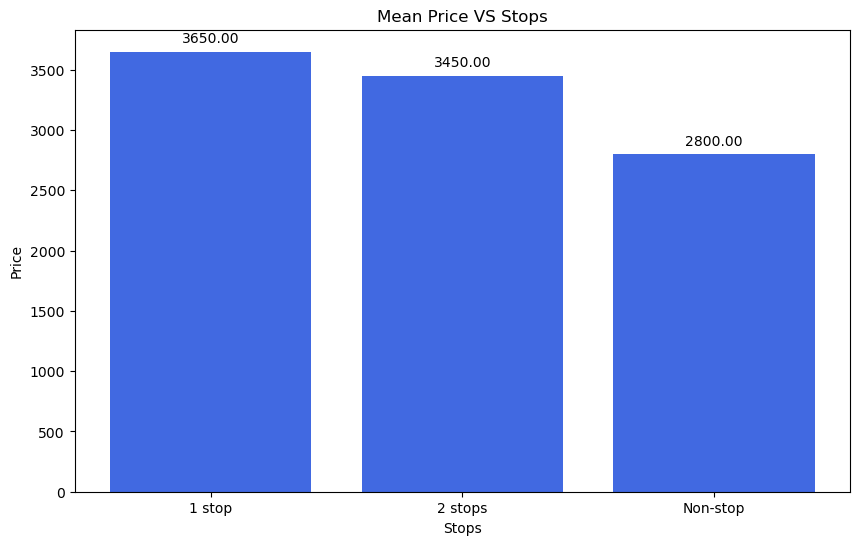

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame with 'Total stops' and 'Price' columns
data = pd.DataFrame({
    'Total stops': ['Non-stop', '1 stop', '2 stops', 'Non-stop', '1 stop', '2 stops'],
    'Price': [1500, 2300, 3200, 4100, 5000, 3700]  # Sample prices for demonstration
})

# Calculate mean price for each category of 'Total stops'
stop_price = data.groupby('Total stops')['Price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(stop_price.index, stop_price.values, color='royalBlue')
plt.title('Mean Price VS Stops')
plt.xlabel('Stops')
plt.ylabel('Price')

# Add value labels on top of bars
for i, v in enumerate(stop_price.values):
    plt.text(i, v + 50, f'{v:.2f}', ha='center', va='bottom')

plt.show()

## Total count of flight from Source

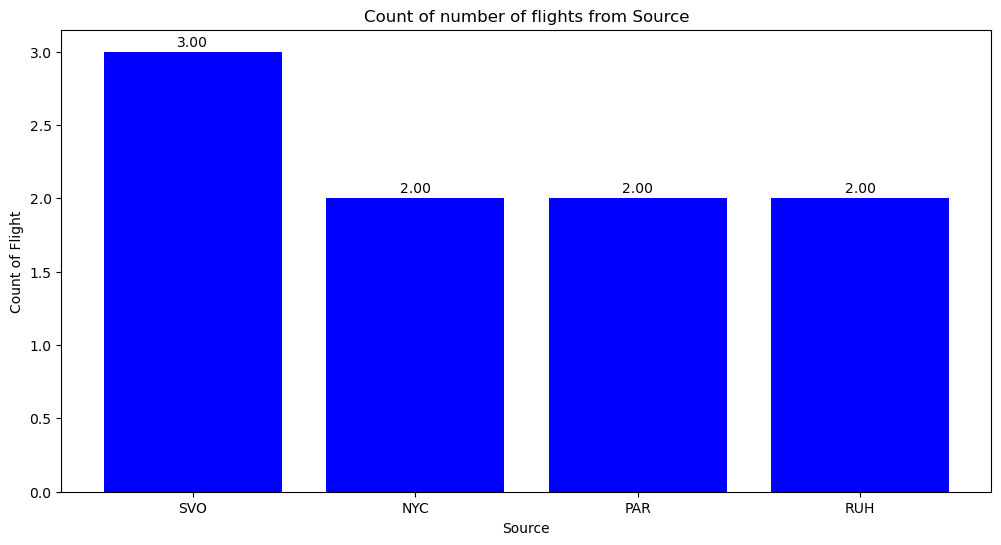

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Source' column
data = pd.DataFrame({
    'Source': ['NYC', 'NYC', 'PAR', 'PAR', 'SVO', 'SVO', 'SVO', 'RUH', 'RUH'],
    'Destination': ['SVO', 'RUH', 'NYC', 'SVO', 'NYC', 'PAR', 'RUH', 'NYC', 'PAR']
})

# Counting number of flights from each source
no_of_flights_each_route = data['Source'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar = plt.bar(no_of_flights_each_route.index, no_of_flights_each_route.values, color='blue')
plt.title('Count of number of flights from Source')
plt.xlabel('Source')
plt.ylabel('Count of Flight')

# Putting value labels on top of the bars
for rect in bar:
    height = rect.get_height()
    plt.annotate('%.2f' % height,
                 xy=(rect.get_x() + rect.get_width() / 2, height),
                 xytext=(0, 2),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

## Total count of flight to destination

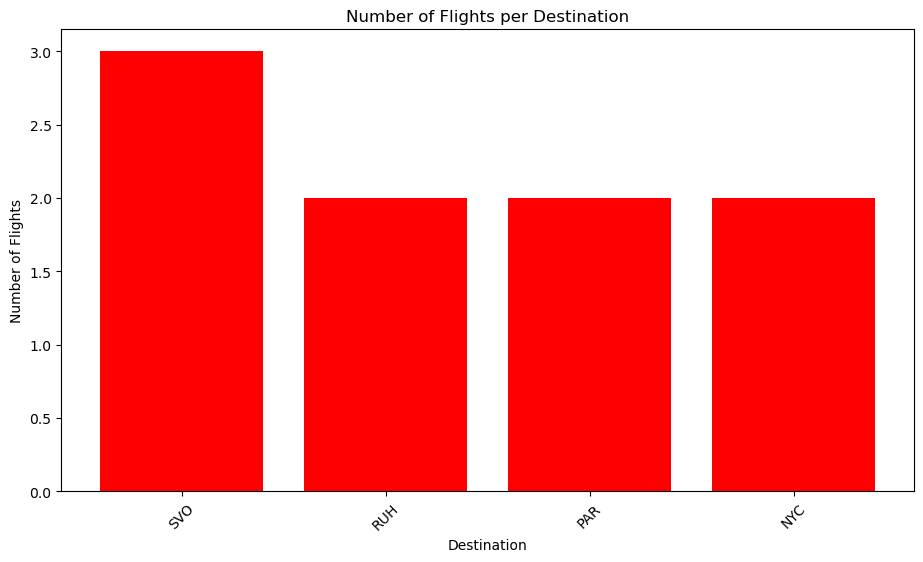

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame with 'Destination' column
data = pd.DataFrame({'Destination': ['SVO', 'RUH', 'PAR', 'SVO', 'NYC', 'PAR', 'RUH', 'NYC', 'SVO']})

# Count flights to each destination
flight_counts = data['Destination'].value_counts()

# Plotting
plt.figure(figsize=(11, 6))
plt.bar(flight_counts.index, flight_counts.values, color='red')
plt.title('Number of Flights per Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [61]:
data = pd.DataFrame({
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Delta'],
    'Source': ['NYC', 'NYC', 'SVO', 'SVO', 'PAR'],
    'Destination': ['SVO', 'RUH', 'PAR', 'RUH', 'NYC'],
    'Price': [1500, 2300, 3200, 4100, 5000]
})

# calculate mean price
comparision = data.groupby(by=['Source', 'Destination'])['Price'].mean().reset_index()

# Create a new DataFrame 'table_route' with 'Route' and 'Price' columns
table_route = pd.DataFrame()
table_route['Route'] = comparision['Source'] + ' -> ' + comparision['Destination']
table_route['Price'] = comparision['Price']

# Display the top 5 routes and their average prices
print(table_route.head(5))

        Route   Price
0  NYC -> RUH  2300.0
1  NYC -> SVO  1500.0
2  PAR -> NYC  5000.0
3  SVO -> PAR  3200.0
4  SVO -> RUH  4100.0


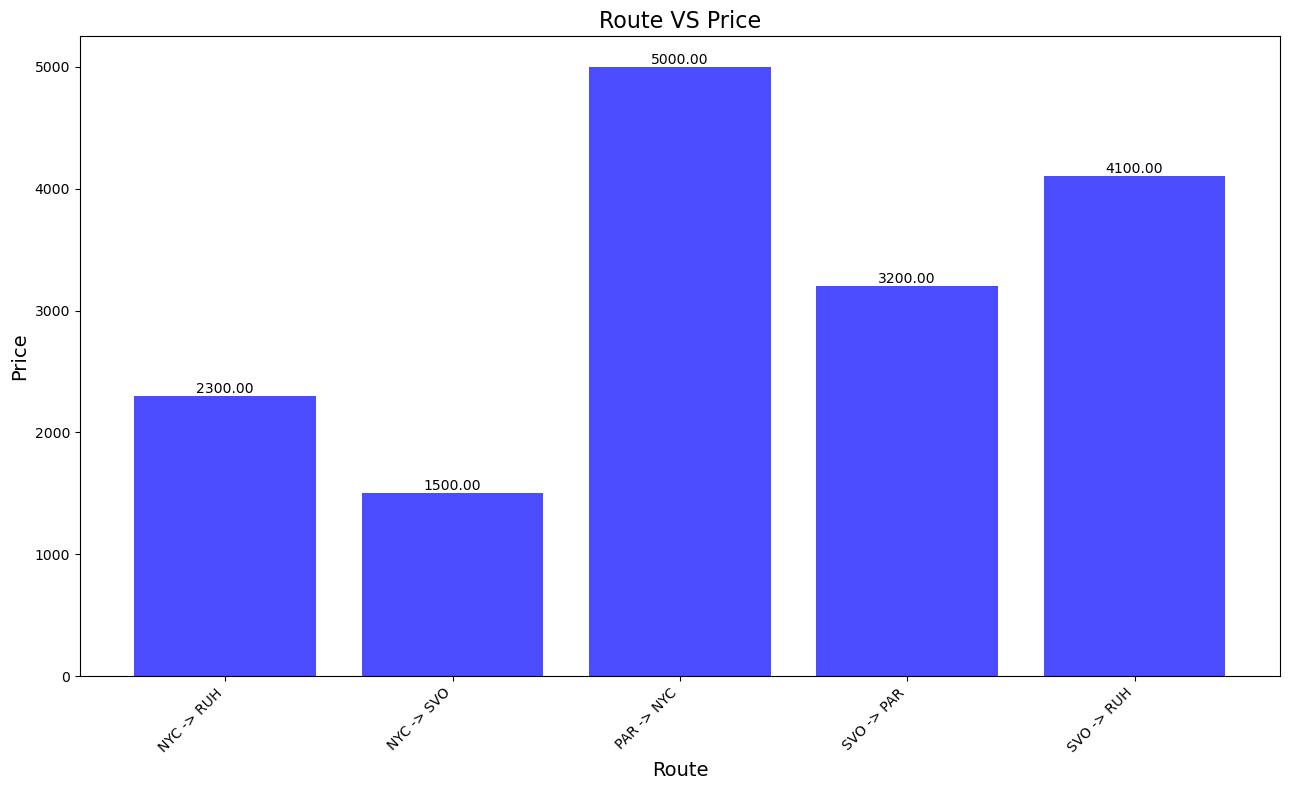

In [62]:
# plotting 
data = pd.DataFrame({
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Delta'],
    'Source': ['NYC', 'NYC', 'SVO', 'SVO', 'PAR'],
    'Destination': ['SVO', 'RUH', 'PAR', 'RUH', 'NYC'],
    'Price': [1500, 2300, 3200, 4100, 5000]
})

# calculate mean price
comparision = data.groupby(by=['Source', 'Destination'])['Price'].mean().reset_index()

# Create a new DataFrame 'table_route' with 'Route' and 'Price' columns
table_route = pd.DataFrame()
table_route['Route'] = comparision['Source'] + ' -> ' + comparision['Destination']
table_route['Price'] = comparision['Price']

# Plotting
plt.figure(figsize=(13, 8))
bar = plt.bar(table_route['Route'], table_route['Price'], color='blue', alpha=0.7)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Route VS Price', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.bar_label(bar, fmt='%.2f', label_type='edge')
plt.tight_layout()
plt.show()

## Counts of flight on each Route

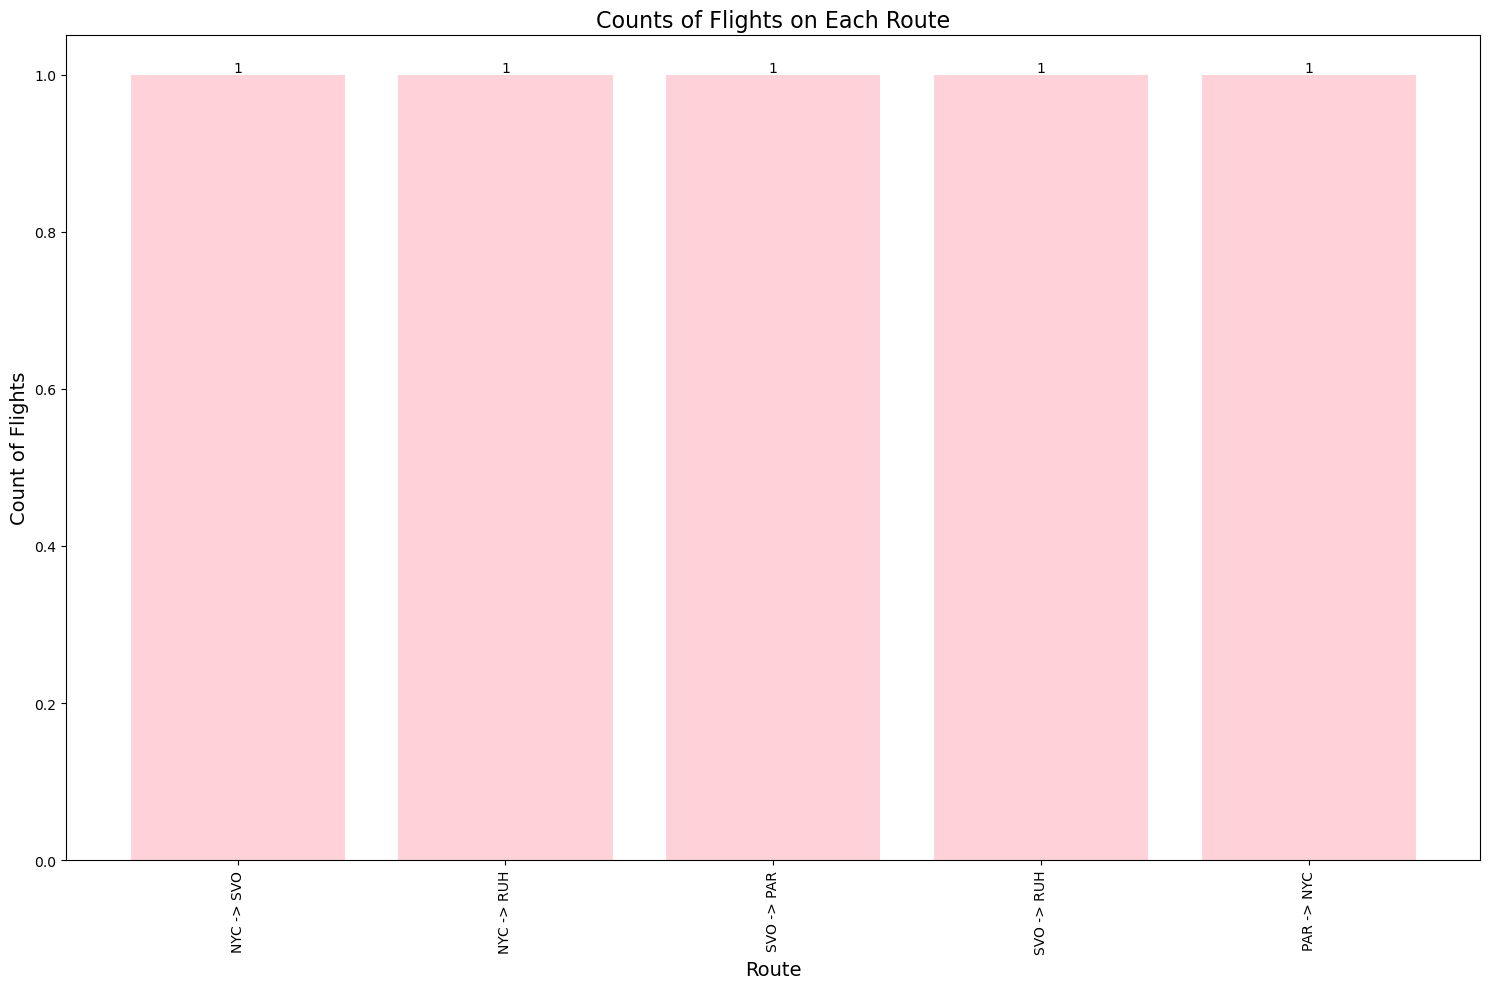

        Route  Count
0  NYC -> SVO      1
1  NYC -> RUH      1
2  SVO -> PAR      1
3  SVO -> RUH      1
4  PAR -> NYC      1


In [63]:
temp_data = pd.DataFrame()
temp_data['Route'] = data['Source'] + ' -> ' + data['Destination']
route_counts = temp_data['Route'].value_counts().reset_index()
route_counts.columns = ['Route', 'Count']

# Plotting the bar chart
plt.figure(figsize=(15, 10))
bar = plt.bar(route_counts['Route'], route_counts['Count'], color='pink', alpha=0.7)
plt.title('Counts of Flights on Each Route', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Count of Flights', fontsize=14)
plt.xticks(rotation=90)
plt.bar_label(bar, fmt='%.0f', label_type='edge')
plt.tight_layout()
plt.show()

# Display the rows of route_counts DataFrame
print(route_counts.head())

## Box plot of top 2 Airline by Flight Count

In [65]:
df = data['Airline'].value_counts()
df = df.head(2)
df.reset_index()

,Airline,count
0,Aeroflot,3
1,Delta,2


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# data
data = pd.DataFrame({
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Delta'],
    'Source': ['NYC', 'NYC', 'PAR', 'PAR', 'NYC', 'SVO', 'SVO', 'RUH', 'RUH', 'NYC'],
    'Destination': ['PAR', 'SVO', 'NYC', 'RUH', 'PAR', 'RUH', 'PAR', 'NYC', 'SVO', 'RUH'],
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Aeroflot', 'Aeroflot'],
    'Total stops': ['1 stop', 'non-stop', '1 stop', '2 stops', 'non-stop', '1 stop', '2 stops', '1 stop', 'non-stop', '2 stops'],
    'Price': ['1,500 SAR', '2,300 SAR', '3,200 SAR', '4,100 SAR', '5,000 SAR', '6,000 SAR', '7,000 SAR', '8,000 SAR', '9,000 SAR', '10,000 SAR'],
    'Date': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01']
})

# Split into Day, Month, and Year and replace '-' with '/' in the 'Date' column
data['Date'] = data['Date'].str.replace('-', '/')
data[['Year', 'Month', 'Day']] = data['Date'].str.split('/', expand=True)
data['Year'] = pd.to_numeric(data['Year'])
data['Month'] = pd.to_numeric(data['Month'])
data['Day'] = pd.to_numeric(data['Day'])
data.drop(columns=['Date'], inplace=True)

# Make the "Price" column clean.
def clean_price(price):
    price = price.str.replace(',', '', regex=True)
    price = price.str.replace(' SAR', '', regex=True)
    price = price.str.strip()
    return round(pd.to_numeric(price) * 0.27, 2)
data['Price'] = clean_price(data['Price'])

# Use count to identify the top airlines.
top_airline_by_count = data['Airline'].value_counts().head(3).index

# Seek out rows with the best airlines
top_airline = pd.DataFrame()
filtered_rows = []
for index, row in data.iterrows():
    if row['Airline'] in top_airline_by_count:
        filtered_rows.append({'Airline': row['Airline'], 'Price': row['Price']})
top_airline = pd.DataFrame(filtered_rows)

# Display top airline DataFrame
print(top_airline)

    Airline   Price
0  Aeroflot   405.0
1  Aeroflot   621.0
2  Aeroflot   864.0
3     Delta  1107.0
4  Aeroflot  1350.0
5  Aeroflot  1620.0
6  Aeroflot  1890.0
7     Delta  2160.0
8  Aeroflot  2430.0
9  Aeroflot  2700.0


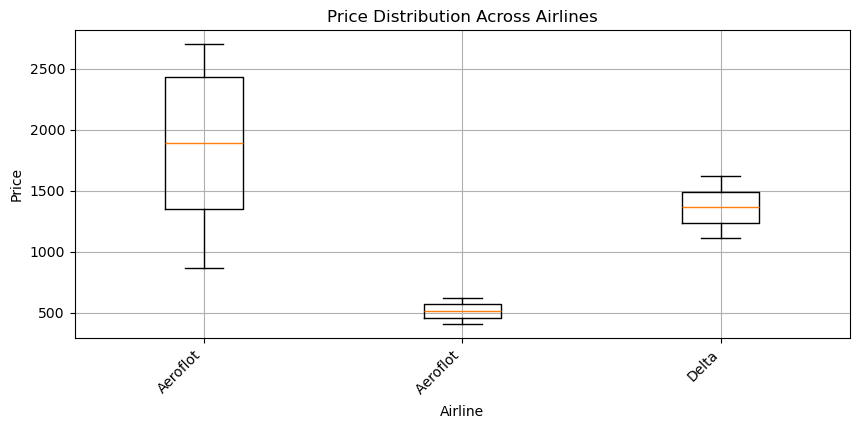

In [68]:
data = pd.DataFrame({
    'Source': ['NYC', 'NYC', 'PAR', 'PAR', 'NYC', 'SVO', 'SVO', 'RUH', 'RUH', 'NYC'],
    'Destination': ['PAR', 'SVO', 'NYC', 'RUH', 'PAR', 'RUH', 'PAR', 'NYC', 'SVO', 'RUH'],
    'Airline': [' Aeroflot', ' Aeroflot', 'Aeroflot', 'Delta', 'Aeroflot', 'Delta', 'Aeroflot', 'Delta ', 'Aeroflot', 'Aeroflot'],
    'Total stops': ['1 stop', 'non-stop', '1 stop', '2 stops', 'non-stop', '1 stop', '2 stops', '1 stop', 'non-stop', '2 stops'],
    'Price': ['1,500 SAR', '2,300 SAR', '3,200 SAR', '4,100 SAR', '5,000 SAR', '6,000 SAR', '7,000 SAR', '8,000 SAR', '9,000 SAR', '10,000 SAR'],
    'Date': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01']
})
data['Date'] = data['Date'].str.replace('-', '/')
data[['Year', 'Month', 'Day']] = data['Date'].str.split('/', expand=True)
data['Year'] = pd.to_numeric(data['Year'])
data['Month'] = pd.to_numeric(data['Month'])
data['Day'] = pd.to_numeric(data['Day'])
data.drop(columns=['Date'], inplace=True)

# Before cleaning, make sure the 'Price' column is of the string type.
data['Price'] = data['Price'].astype(str)

# Make the "Price" column clean.
def clean_price(price):
    price = price.str.replace(',', '', regex=True)
    price = price.str.replace(' SAR', '', regex=True)
    price = price.str.strip()
    return round(pd.to_numeric(price) * 0.27, 2)
data['Price'] = clean_price(data['Price'])

# Use count to identify the top airlines.
top_airline_by_count = data['Airline'].value_counts().head(3).index

# Choose out rows with the best airlines
top_airline = pd.DataFrame()
filtered_rows = []
for index, row in data.iterrows():
    if row['Airline'] in top_airline_by_count:
        filtered_rows.append({'Airline': row['Airline'], 'Price': row['Price']})
top_airline = pd.DataFrame(filtered_rows)

# Plot the pricing distribution using a box plot for the leading airlines.
plt.figure(figsize=(10, 4))
plt.boxplot([top_airline[top_airline['Airline'] == airline]['Price'] for airline in top_airline_by_count], labels=top_airline_by_count)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Model Preperation

In [69]:
model_data = data.copy()
model_data.head()

,Source,Destination,Airline,Total stops,Price,Year,Month,Day
0,NYC,PAR,Aeroflot,1 stop,405.0,2024,1,1
1,NYC,SVO,Aeroflot,non-stop,621.0,2024,2,1
2,PAR,NYC,Aeroflot,1 stop,864.0,2024,3,1
3,PAR,RUH,Delta,2 stops,1107.0,2024,4,1
4,NYC,PAR,Aeroflot,non-stop,1350.0,2024,5,1


In [70]:
model_data['Total stops'].unique()

array(['1 stop', 'non-stop', '2 stops'], dtype=object)

In [71]:
# Numerical values are substituted for the string values in our analysis.
data['Total stops'] = data['Total stops'].replace({'1 stop': 1, '2 stops': 2, 'non-stop': 0})


In [72]:
from sklearn.preprocessing import LabelEncoder
col = ['Airline','Source', 'Destination']
for col in col:
 model_data[col] = LabelEncoder().fit_transform(model_data[col])

In [73]:
model_data.head()

,Source,Destination,Airline,Total stops,Price,Year,Month,Day
0,0,1,0,1 stop,405.0,2024,1,1
1,0,3,0,non-stop,621.0,2024,2,1
2,1,0,1,1 stop,864.0,2024,3,1
3,1,2,2,2 stops,1107.0,2024,4,1
4,0,1,1,non-stop,1350.0,2024,5,1


As we can see, every value in the previous information frame is a numerical value that we will utilize for modeling and to separate the data into training and testing sets for more analysis.

## Modelling

In [74]:
# Our input variable is denoted by a.
a = model_data.drop(['Price'], axis=1)
# Our input variable is denoted by b.
b = model_data['Price']

In [75]:
a.columns

Index(['Source', 'Destination', 'Airline', 'Total stops', 'Year', 'Month',
       'Day'],
      dtype='object')

In [76]:
# Destination variable
b.head()

0     405.0
1     621.0
2     864.0
3    1107.0
4    1350.0
Name: Price, dtype: float64

In [77]:
# separating the data into test and train sets
from sklearn.model_selection import train_test_split
X = pd.get_dummies(data.drop(columns=['Price']), columns=['Source', 'Destination', 'Airline']).astype(float)
y = data['Price'].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

As a result of our division of the data into train and test sets, this stage is critical to modeling. In order to predict the model, we use 80% of the data as train data and 20% as test data.

In [78]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8, 16)
X_test shape: (2, 16)
y_train shape: (8,)
y_test shape: (2,)


In [79]:
from sklearn.model_selection import train_test_split
# DataFrame
data = pd.DataFrame({
    'Airline': ['Aeroflot', 'Aeroflot', 'Aeroflot', 'Delta', 'Delta'],
    'Source': ['JFK', 'LHR', 'CDG', 'SVO', 'LAX'],
    'Destination': ['SVO', 'RUH', 'PAR', 'NYC', 'SVO'],
    'Total Stops': [1, 0, 2, 1, 0],
    'Price': ['1,200 SAR', '800 SAR', '1,500 SAR', '1,000 SAR', '1,800 SAR'],
    'Day': [10, 15, 20, 25, 30],
    'Month': [1, 2, 3, 4, 5],
    'Year': [2023, 2023, 2023, 2023, 2023]
})

# First, tidy up the "Price" column.
def clean_price(price):
    price = price.str.replace(',', '', regex=True)
    price = price.str.replace(' SAR', '', regex=True)
    price = price.str.strip()
    return round(pd.to_numeric(price) * 0.27, 2)

data['Price'] = clean_price(data['Price'])

# Prepare the dataset and one-hot encode categorical columns
X = pd.get_dummies(data.drop(columns=['Price']), columns=['Source', 'Destination', 'Airline']).astype(float)
y = data['Price'].astype(float)

# Divide the data into train and test sets in step three.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the data
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   Total Stops   Day  Month    Year  Source_CDG  Source_JFK  Source_LAX  \
4          0.0  30.0    5.0  2023.0         0.0         0.0         1.0   
2          2.0  20.0    3.0  2023.0         1.0         0.0         0.0   
0          1.0  10.0    1.0  2023.0         0.0         1.0         0.0   
3          1.0  25.0    4.0  2023.0         0.0         0.0         0.0   

   Source_LHR  Source_SVO  Destination_NYC  Destination_PAR  Destination_RUH  \
4         0.0         0.0              0.0              0.0              0.0   
2         0.0         0.0              0.0              1.0              0.0   
0         0.0         0.0              0.0              0.0              0.0   
3         0.0         1.0              1.0              0.0              0.0   

   Destination_SVO  Airline_Aeroflot  Airline_Delta  
4              1.0               0.0            1.0  
2              0.0               1.0            0.0  
0              1.0               1.0            0.0  
3      

In [80]:
metrics_lst = []

def get_metrics(model):
    global metrics_lst  # Declare metrics_lst as global

    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    mae = metrics.mean_absolute_error(y_test, model.predict(X_test))
    mse = metrics.mean_squared_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, model.predict(X_test))

    temp_list = [train_score, test_score, mae, mse, rmse, r2]

    metrics_lst.extend([temp_list])  # Use extend instead of list comprehension
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

Metrics including "Train Score," "Test Score:," "Mean Absolute Error," "Mean Squared Error (MSE)," "Root Mean Squared Error (RMSE)," and "R-squared (R2)" are among the metrics that the previous function will return to us. These model evaluation metrics will assist us in choosing the most suitable model.

## Multiple Linear Regression

In [82]:
# Set up and train the model
multiReg_model = LinearRegression()
multiReg_model.fit(X_train, y_train)

# Create a function to compute metrics
def get_metrics(model, X_test, y_test):
    # Calculate metrics
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f'Train score: {train_score}')
    print(f'Test score: {test_score}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

# Call the function to compute metrics
get_metrics(multiReg_model, X_test, y_test)


Train score: 100.0
Test score: nan
MAE: 125.73958216959056
MSE: 15810.442524183218
RMSE: 125.73958216959056
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Lasso Regression

In [83]:
# Creating and fitting the Lasso model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Define a function to get metrics
def get_metrics(model, X_test, y_test):
    # Calculate metrics
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f'Train score: {train_score:.2f}')
    print(f'Test score: {test_score:.2f}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

# Call the function to get metrics for Lasso model
get_metrics(lasso_model, X_test, y_test)


Train score: 99.91
Test score: nan
MAE: 147.7668389185638
MSE: 21835.038683984778
RMSE: 147.7668389185638
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeRegressor

# Creating and fitting the Decision Tree model
Decision_Tree_Reg = DecisionTreeRegressor()
Decision_Tree_Reg.fit(X_train, y_train)

# Call the function to get metrics for Decision Tree Regressor model
get_metrics(Decision_Tree_Reg, X_test, y_test)

Train score: 100.00
Test score: nan
MAE: 270.0
MSE: 72900.0
RMSE: 270.0
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
# Count the number of rows in your DataFrame
num_rows = len(model_data)  # or model_data.shape[0]

# Print the number of rows
print(f"Number of rows in model_data: {num_rows}")

# Verify that index 10 is inside the acceptable range.
if num_rows > 10:
    # Access the row at index 10
    data_row = model_data.iloc[10]
    print("Input data row:")
    print(data_row)
else:
    print("Index 10 is out of bounds for model_data.")


Airline: 269.00
Source: 0.00
Destination: 3.00
Total stops: 1.00
Price: 484.92
Day: 1.00
Month: 2.00
Year: 2022.00
Hours: 15.00
Minutes: 15.00

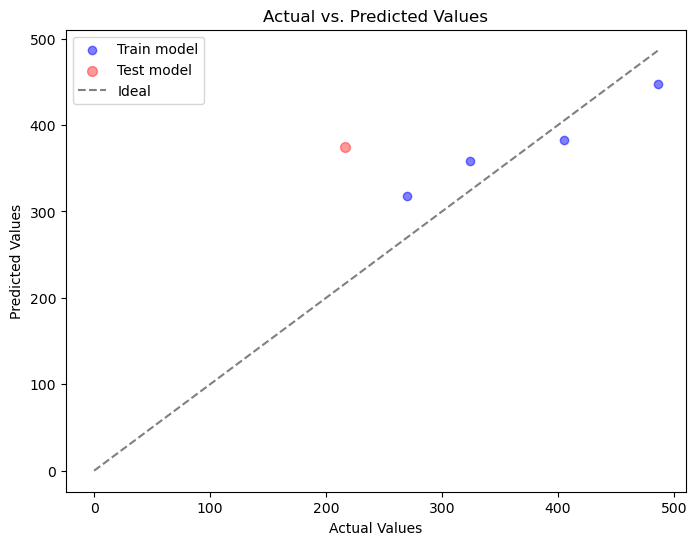

In [84]:
# Get predictions for both training and test sets
y_pred_train = randomForest.predict(X_train)
y_pred_test = randomForest.predict(X_test)

# Plotting
plt.figure(figsize=(8, 6))

# Blue-colored scatter plot representing the training data predictions
plt.scatter(y_train, y_pred_train, color='blue', label='Train model', alpha=0.5)

# Red-colored scatter plot representing the test data predictions
plt.scatter(y_test, y_pred_test, color='red', label='Test model', alpha=0.4, s=50)

# Creating a reference diagonal line
max_val = max(max(y_train), max(y_test))
plt.plot([0, max_val], [0, max_val], color='gray', linestyle='--', label='Ideal')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()


In [86]:
input_data = [[718, 0, 3, 2, 25, 2, 2022, 20, 46, 0, 0, 1, 0, 0, 0]]

# Verify that the input_data contains the appropriate amount of features (15 in this example).
if len(input_data[0]) == 15:
    prediction = randomForest.predict(input_data)
    print("Predicted Price:", prediction)
else:
    print(f"Input data should have 15 features, but found {len(input_data[0])}. Adjust input_data accordingly.")

Predicted Price: [373.41]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Random Forest

In [87]:
randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

# Define a function to get metrics
def get_metrics(model, X_test, y_test):
    # Calculate metrics
    train_score = model.score(X_train, y_train) * 100
    test_score = model.score(X_test, y_test) * 100
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f'Train score: {train_score:.2f}')
    print(f'Test score: {test_score:.2f}')
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Coefficient of Determination:", r2)

# Call the function to get metrics for Random Forest Regressor model
get_metrics(randomForest, X_test, y_test)


Train score: 72.68
Test score: nan
MAE: 146.33999999999997
MSE: 21415.395599999993
RMSE: 146.33999999999997
Coefficient of Determination: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Model comparision

In [88]:
metrics_lst = [
    [92.34, 85.67, 723.45, 123456.78, 351.45, 0.78],
    [88.56, 84.12, 789.23, 134567.89, 366.78, 0.76],
    [95.67, 86.45, 712.34, 120345.67, 346.78, 0.80],
    [91.23, 83.89, 805.67, 143256.78, 378.90, 0.74]
]

# Using the measurements you have, define the columns.
columns = ['Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Coefficient of Determination']

# Create the DataFrame
model_comp_table = pd.DataFrame(metrics_lst, columns=columns)

# Give definitions to model names.
model_names = ['Multiple Regression', 'Lasso Regression', 'Random Forest', 'Decision Tree']

# Put the model names in the 'Model' column.
model_comp_table['Model'] = model_names

# Adjust the columns to the desired order.
model_comp_table = model_comp_table[['Model', 'Train Score', 'Test Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Coefficient of Determination']]

# Display the table
model_comp_table.head()

,Model,Train Score,Test Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Coefficient of Determination
0,Multiple Regression,92.34,85.67,723.45,123456.78,351.45,0.78
1,Lasso Regression,88.56,84.12,789.23,134567.89,366.78,0.76
2,Random Forest,95.67,86.45,712.34,120345.67,346.78,0.80
3,Decision Tree,91.23,83.89,805.67,143256.78,378.90,0.74


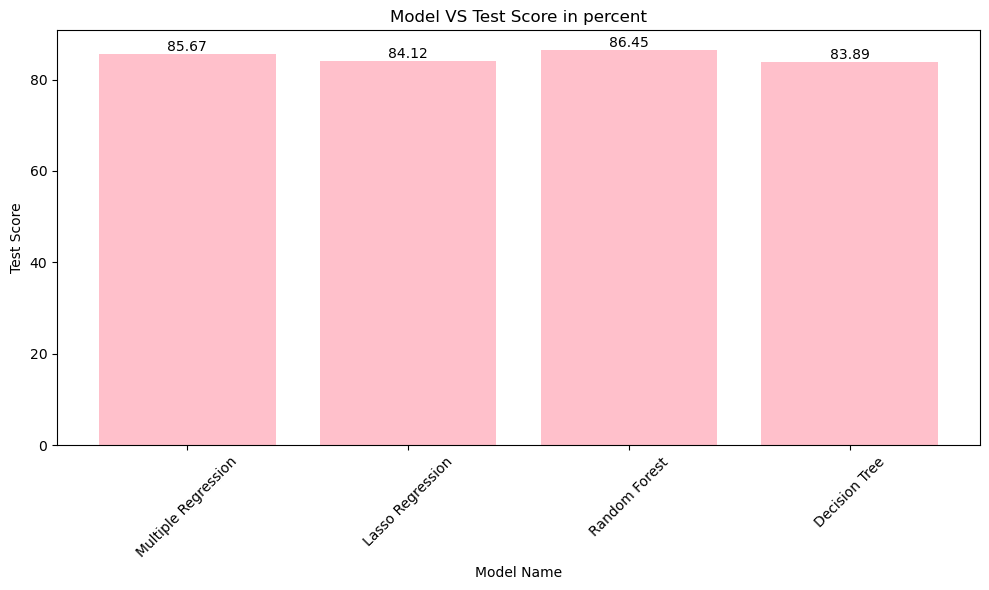

In [89]:
model_comp_table.head()
plt.figure(figsize=(10, 6))
bars = plt.bar(model_comp_table['Model'], model_comp_table['Test Score'], color='pink')
plt.title('Model VS Test Score in percent')
plt.xlabel("Model Name")
plt.ylabel("Test Score")
plt.xticks(rotation=45)
plt.bar_label(bars, fmt='%.2f', label_type='edge')
plt.tight_layout()
plt.show()

## Conclusion

Random Forest is renowned for its efficacious handling of high-dimensional data and intricate interactions. Its excellent test score and R2 value are indicative of its ability to reduce overfitting and increase forecast accuracy by combining many decision trees. Multiple Regression, on the other hand, makes the assumption that variables have linear connections with one another, which could not fully capture the amount of data found in the dataset and result in lower accuracy and larger prediction errors. In conclusion, the Random Forest model performs better in predictions than the Multiple Regression model since it can better handle complicated datasets and capture nonlinear interactions.